In [3]:
1.1560793647121986e-02*2./3.

0.007707195764747991

yt : [WARNING  ] 2020-07-20 13:37:19,060 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2020-07-20 13:37:19,064 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2020-07-20 13:37:19,065 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2020-07-20 13:37:19,066 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2020-07-20 13:37:19,083 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-20 13:37:19,085 Parameters: domain_dimensions         = [10 20 10]
yt : [INFO     ] 2020-07-20 13:37:19,087 Parameters: domain_left_edge          = [-0.5  -0.75 -0.5 ]
yt : [INFO     ] 2020-07-20 13:37:19,089 Parameters: domain_right_edge         = [0.5  0.75 0.5 ]
yt : [INFO     ] 2020-07-20 13:37:19,090 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-07-20 13:37:19,541 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:19,541 ylim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:19,542 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:19,543 ylim = -0.500000 0.500000
yt : [INFO     ] 2020-


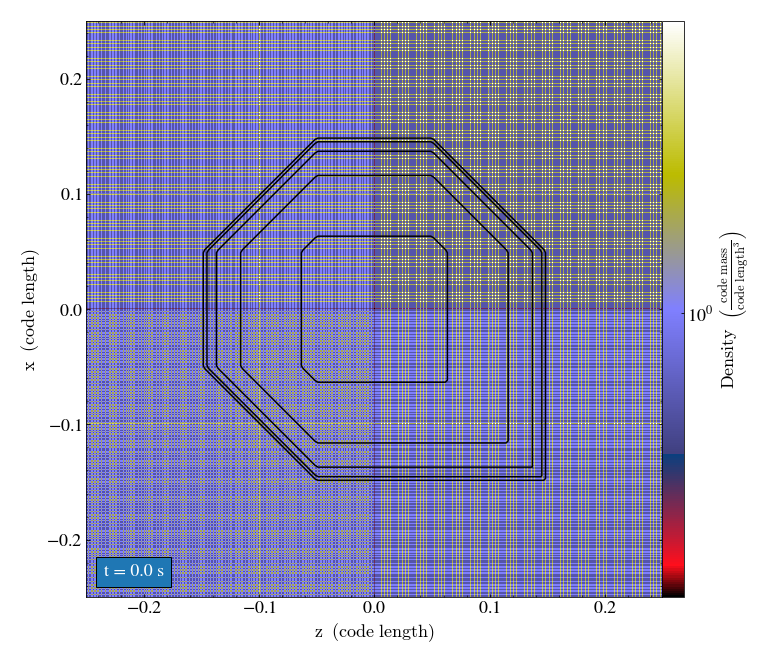

yt : [WARNING  ] 2020-07-20 13:37:20,396 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2020-07-20 13:37:20,398 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2020-07-20 13:37:20,400 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2020-07-20 13:37:20,401 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2020-07-20 13:37:20,414 Parameters: current_time              = 0.011560794
yt : [INFO     ] 2020-07-20 13:37:20,416 Parameters: domain_dimensions         = [10 20 10]
yt : [INFO     ] 2020-07-20 13:37:20,417 Parameters: domain_left_edge          = [-0.5  -0.75 -0.5 ]
yt : [INFO     ] 2020-07-20 13:37:20,418 Parameters: domain_right_edge         = [0.5  0.75 0.5 ]
yt : [INFO     ] 2020-07-20 13:37:20,420 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-07-20 13:37:20,837 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:20,838 ylim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:20,839 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-07-20 13:37:20,840 ylim = -0.500000 0.500000
yt : [INFO    


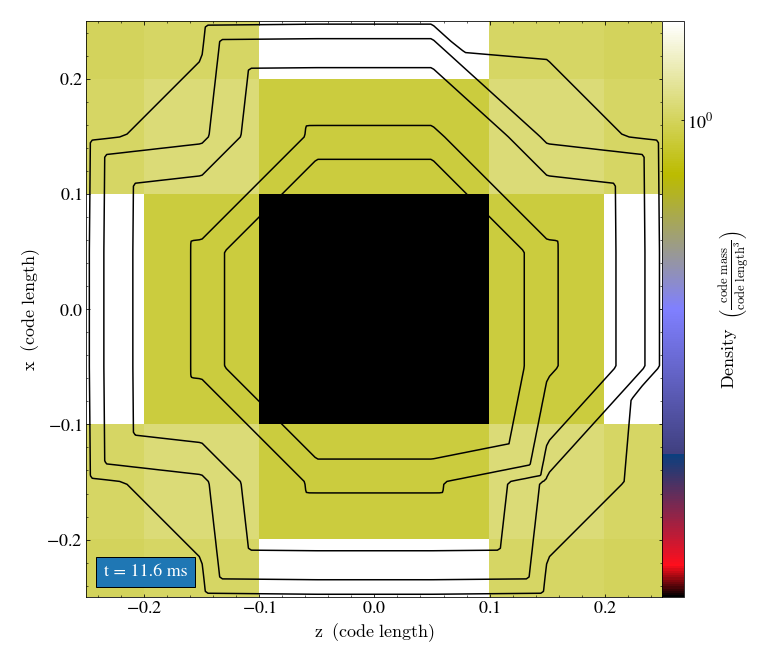

yt : [ERROR    ] 2020-07-20 13:37:21,598 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2020-07-20 13:37:21,599 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('../../../runs/Blast.out2.00002.athdf',) {}, but could not load!

In [2]:
# conda activate py3 in the laptop
import yt
import os
import numpy as np
import matplotlib.pyplot as plt
import physicalConst as const

c=const.CGS_C
G=const.CGS_G
mp=const.CGS_AMU
msun=const.CGS_MSUN

#units_override = {"length_unit":(1.0,"Mpc"),
#                  "time_unit"(1.0,"Myr"),
#                  "mass_unit":(1.0e14,"Msun")}


path='../../../runs/'
out_dir=path+'analysis/slices'
os.system("mkdir -p %s"%out_dir)

for i in range(26): #[1,3,6,10,12,15,17]:  #range(0,200[,10]): #range(14):
  file="Blast.out2.%05d.athdf"%i
  ds = yt.load(path+file) #, units_override=units_override)
  s = yt.SlicePlot(ds,"y",["density"],center="center")
  s.set_cmap("density","gist_stern")
  #s.annotate_velocity(scale=2)
  s.annotate_contour("temperature")
  s.zoom(2.0)
  s.annotate_timestamp()
  s.save("%s/slice_%05d"%(out_dir,i))
  s.show()

In [ ]:
hist=np.loadtxt(path+'Blast.hst')
# Athena++ history data
# [1]=time     [2]=dt       [3]=mass     [4]=1-mom    [5]=2-mom    [6]=3-mom    [7]=1-KE     [8]=2-KE     [9]=3-KE     [10]=tot-E   
time=hist[:,0]; mass=hist[:,2]
plt.plot(time,mass)
plt.show()

## Kilonova Physics 

In [ ]:
#interstellar density
n = 1 #cm^-3  in terms of Hydrogen number density
rho_ism = n*mp 
mej = 0.001 * msun  #ejecta mass from kilnova
vej = 0.2*c # kilonova ejecta velocity 


# time at which swept up mass becomes comparable to ejecta mass
rs = (3*mej/(4*np.pi*rho_ism))**(1./3.) #cm
print('%1.2e km'%(rs/1.e5))
# radius at which 
ts = rs/vej
print('%2.2f yrs'%(ts/(365*24*3600)))

In [ ]:
print(c,msun,mp)

In [ ]:
4*np.pi*1.e-3*0.05

## Conformal transformation functions in Athena++

In [ ]:
#prefactor in blast_exp_grid

rho_amb=1
Esn=6.28
C=(25*Esn/(4*np.pi*rho_amb))**(1./5.)
print(C)
print(C**(5./3.)*(3./5.)**(2./3.))

In [ ]:
t = np.logspace(-3,3,20)
print(t)
Rs = t**(2./5.)

plt.loglog(t,Rs)
plt.show()

In [ ]:
tau=np.logspace(-3,3.8,100)
#time=((3*1.6506*tau/5.)**(5./3.))
#time=np.exp(tau)

plt.loglog(tau,time/(3600*24))
plt.xlabel('code time (cycle)')
plt.ylabel('physical time (days)')
plt.xlim([1.e0,1.e4])
plt.show()

print(np.exp(3.8)/1.e-3/3600)